In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def show_single_image(img, figsize=(7, 5)):
    fig = plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(img)
    plt.show()

def show_two_images(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].axis("off")
    ax[0].imshow(img1)

    ax[1].axis("off")
    ax[1].imshow(img2)

    plt.show()

## SIFT Tutorial

### Load two images

In [4]:
boat1 = cv2.imread('boat1.pgm', cv2.IMREAD_GRAYSCALE)

In [5]:
boat1.min(), boat1.max(), boat1.shape

(3, 252, (680, 850))

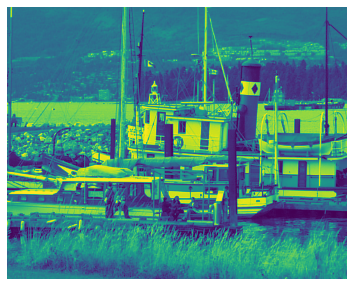

In [6]:
show_single_image(boat1)

### Detect keypoints using SIFT

In [7]:
sift = cv2.SIFT_create()

In [8]:
kp = sift.detect(boat1, None)

In [9]:
len(kp), kp[0].pt

(8849, (2.3868184089660645, 168.14126586914062))

In [10]:
boat1_with_kp = cv2.drawKeypoints(boat1, kp, boat1)

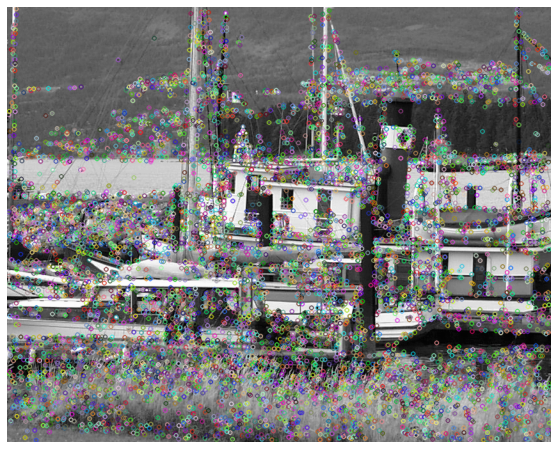

In [11]:
show_single_image(boat1_with_kp, figsize=(10, 8))

### Detect and describe keypoints using SIFT

In [12]:
sift = cv2.SIFT_create(contrastThreshold=0.1, edgeThreshold=5)
kp, des = sift.detectAndCompute(boat1, None)

In [13]:
boat1_with_kp = cv2.drawKeypoints(boat1, kp, boat1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

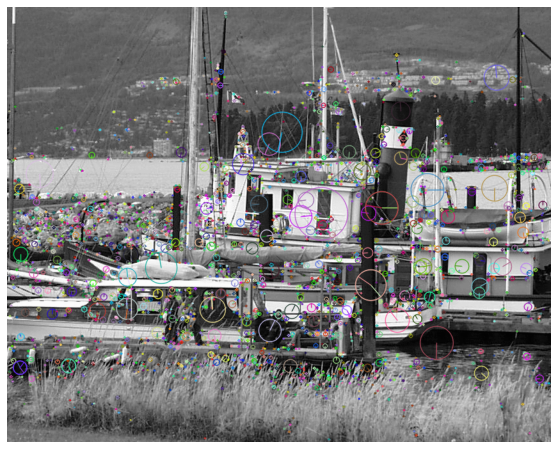

In [14]:
show_single_image(boat1_with_kp, figsize=(10, 8))

In [17]:
des.shape, len(kp)

((3317, 128), 3317)

## Brute-force matching tutorial

In [18]:
boat1 = cv2.imread('boat1.pgm', cv2.IMREAD_GRAYSCALE)
boat2 = cv2.imread('boat2.pgm', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create(contrastThreshold=0.1, edgeThreshold=5)

kp1, des1 = sift.detectAndCompute(boat1, None)
boat1_with_kp = cv2.drawKeypoints(boat1, kp, boat1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

kp2, des2 = sift.detectAndCompute(boat2, None)
boat2_with_kp = cv2.drawKeypoints(boat2, kp, boat2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

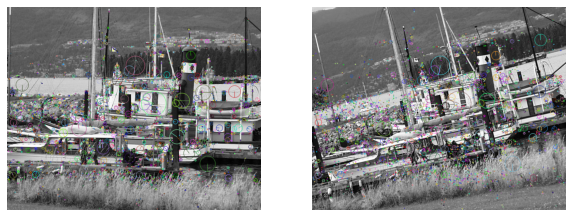

In [19]:
show_two_images(boat1_with_kp, boat2_with_kp)

In [23]:
des1.dtype, des2.dtype

(dtype('float32'), dtype('float32'))

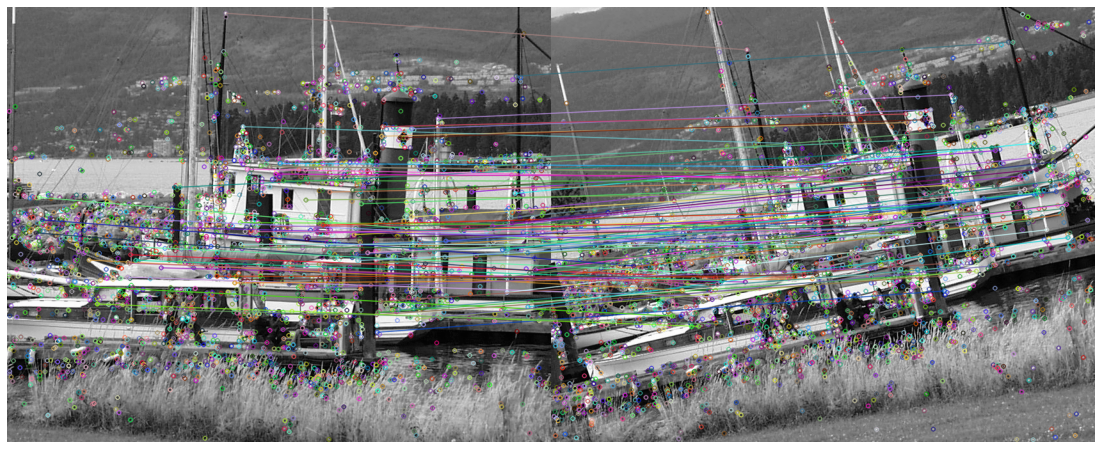

In [33]:
# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first K matches.
K = 100
img3 = cv2.drawMatches(boat1, kp1, boat2, kp2, matches[:K], outImg=None)

show_single_image(img3, figsize=(20, 8))